In [1]:
import sys
sys.path.append('../Modules')

import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

from Kernel import RBF, GaussianProcessClassifier
np.random.seed(1234)
def create_data():    
    x0 = np.random.normal(size=50).reshape(-1, 2)
    x1 = np.random.normal(size=50).reshape(-1, 2) + 2.
    return np.concatenate([x0, x1]), np.concatenate([np.zeros(25), np.ones(25)]) 

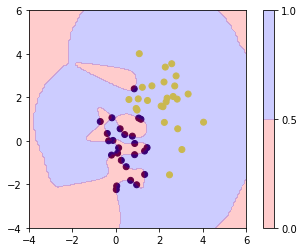

In [2]:
x_train, t_train = create_data()
x0, x1 = np.meshgrid(np.linspace(-4, 6, 100), np.linspace(-4, 6, 100))
x = np.array([x0, x1]).reshape(2, -1).T

model = GaussianProcessClassifier(RBF(np.array([1., 7., 7.])))
model.fit(x_train, t_train)
t = model.predict(x)

plt.scatter(x_train[:, 0], x_train[:, 1], c=t_train)
plt.contourf(x0, x1, t.reshape(100, 100), levels=np.linspace(0,1,3), alpha=0.2, 
             cmap=matplotlib.colors.ListedColormap(['red','green','blue']))
plt.colorbar()
plt.xlim(-4, 6)
plt.ylim(-4, 6)
plt.gca().set_aspect('equal', adjustable='box')